In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
%cd /content/drive/MyDrive/datasets/medical_insurance_cost/
%ls

/content/drive/MyDrive/datasets/medical_insurance_cost
data.csv  gradient_boosting.pkl


In [30]:
df = pd.read_csv('./data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.shape

(1338, 7)

In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [34]:
#lets look into the number of missing rows in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values in our dataset.
Next we perform some visualizations to see relationships

Text(0.5, 1.0, 'Distribution of Charges')

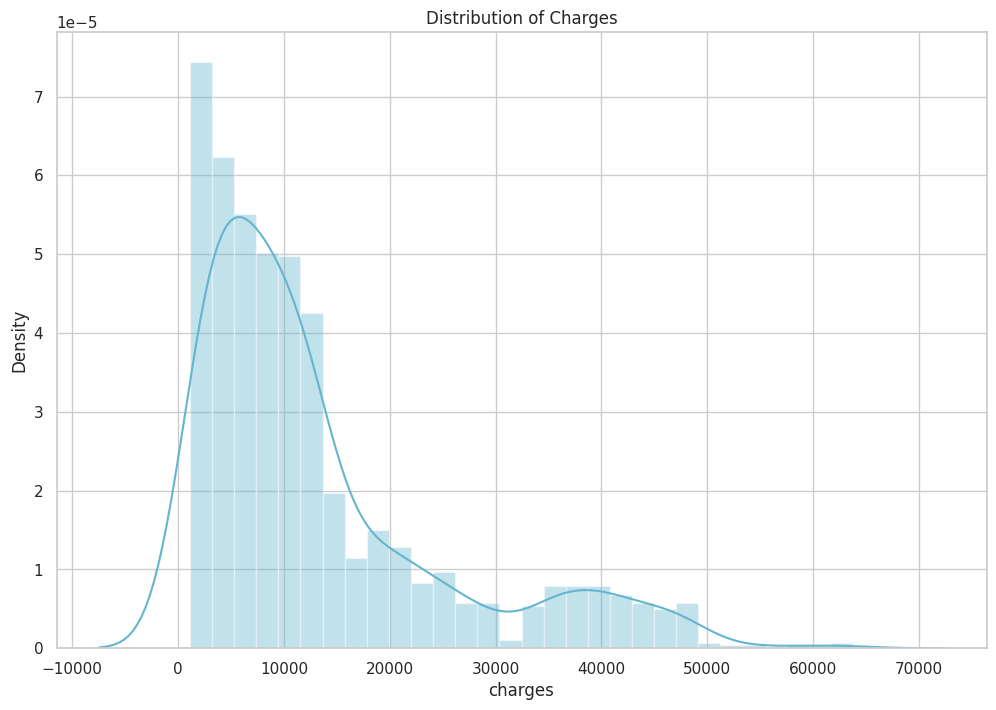

In [35]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

Lets look into the insurances charges based on regions

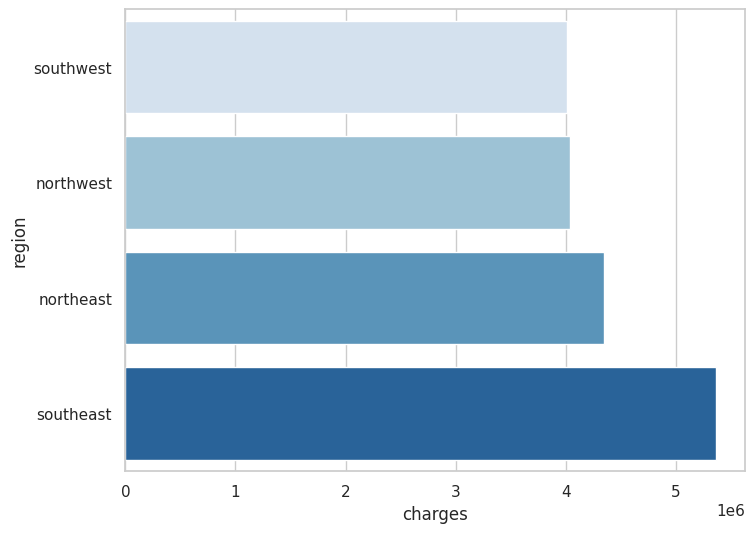

In [36]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

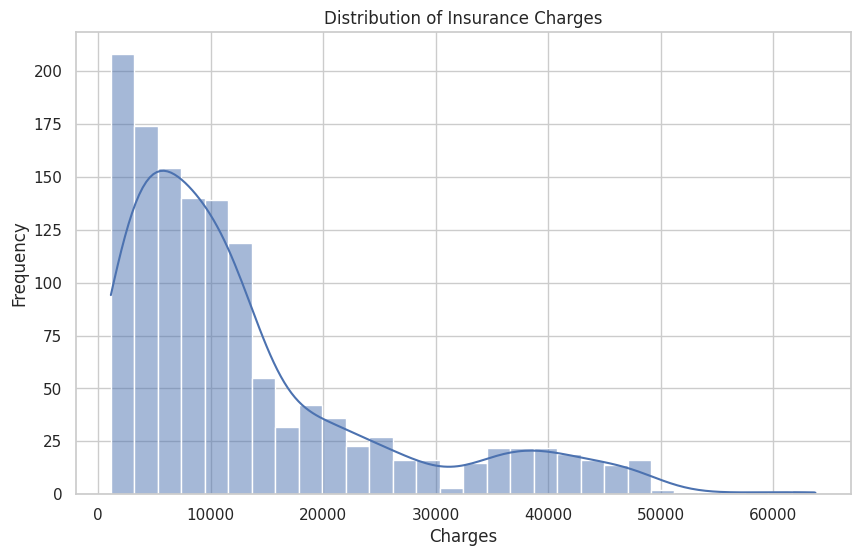

In [37]:
# Distribution of Charges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


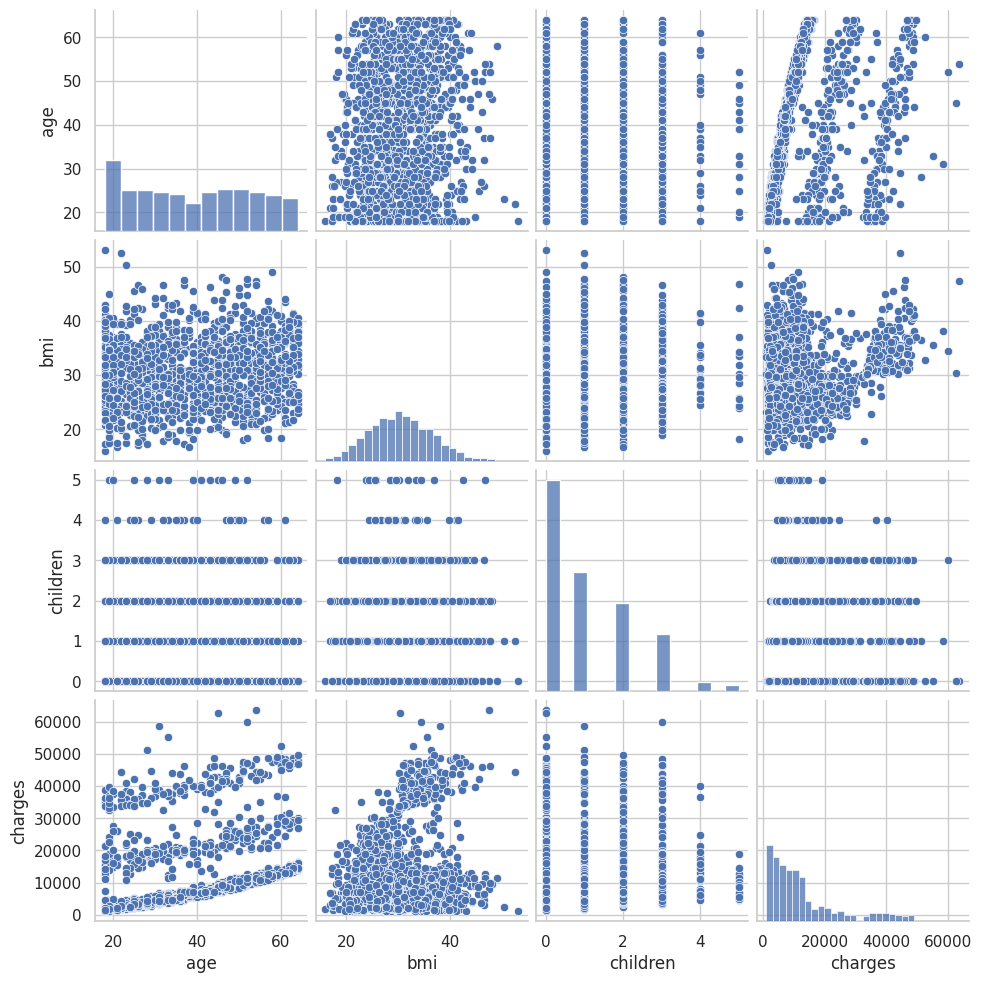

In [38]:
# lets explore the pairwise relationships between numeric variables (age, bmi, children, charges).
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()


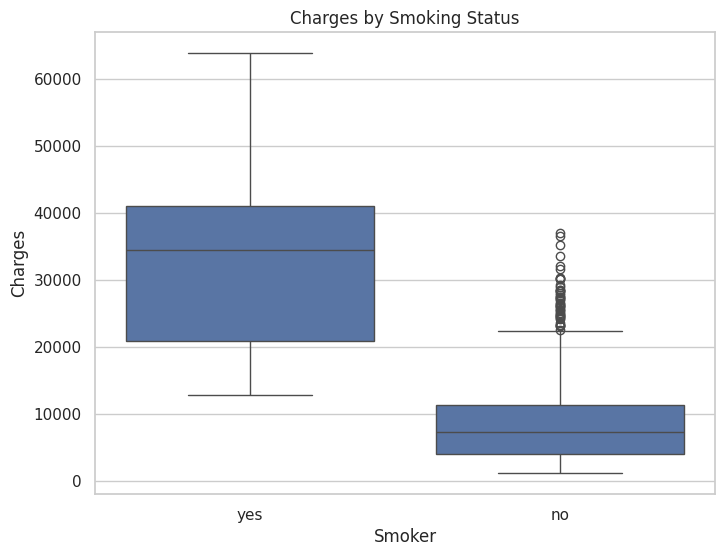

In [39]:
#lets see the Boxplot of Charges by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

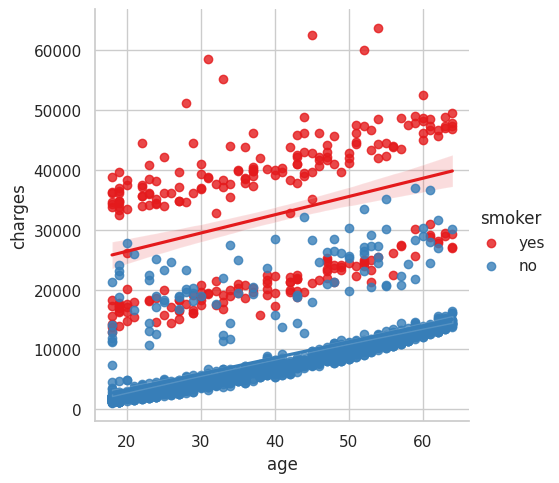

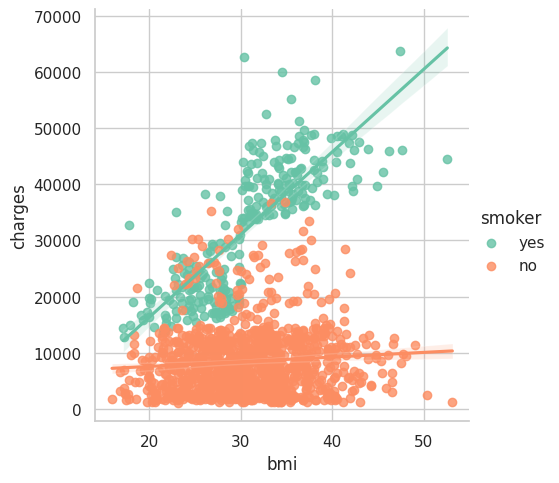

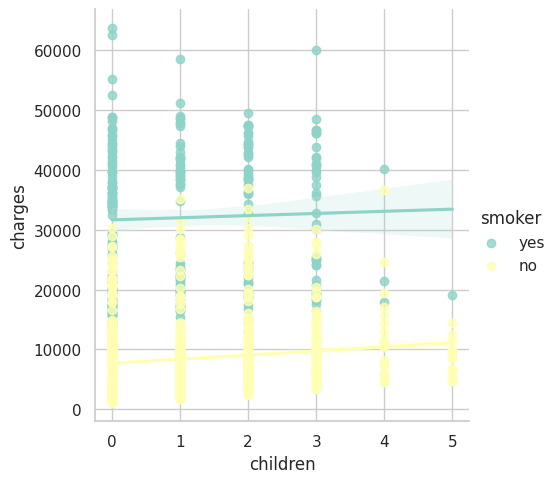

In [40]:
#Now let's analyze the medical charges by age, bmi and children according to the smoking factor

ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

It can be seen that smoking has a huge impact on medical costs

In [41]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [42]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
##Converting category labels into numerical using LabelEncoder

label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

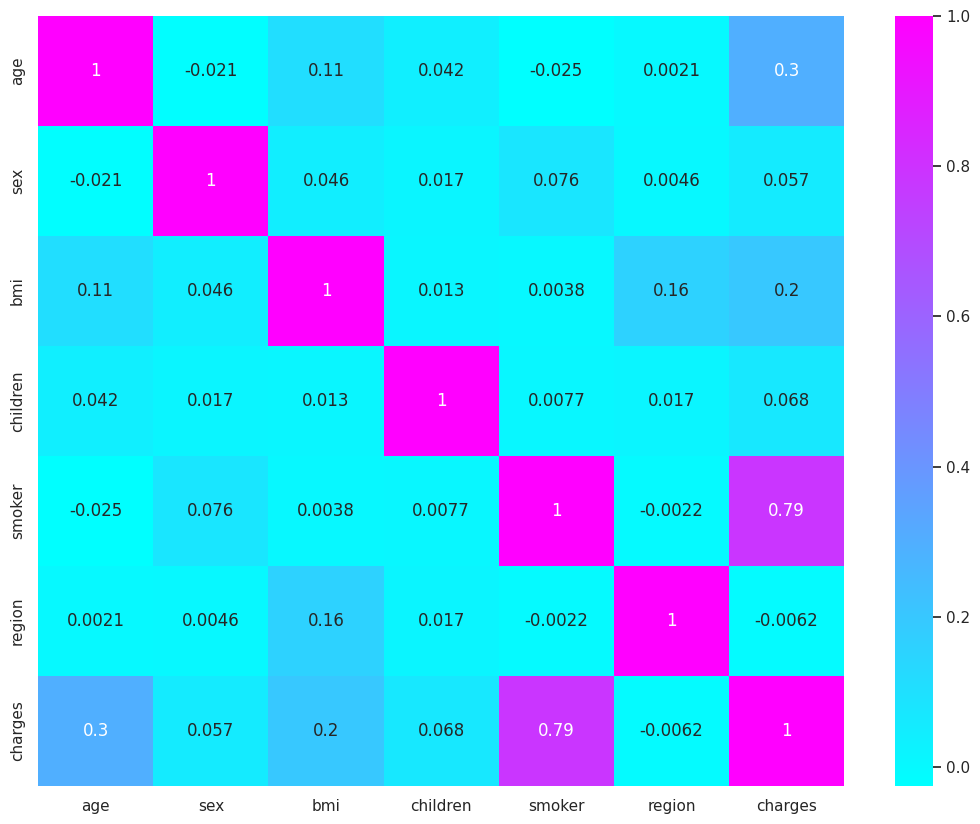

In [44]:
#lets visualize the confusion matrix
f, ax = plt.subplots(1, 1, figsize=(13, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="cool")

In [45]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [46]:
# Define a list of regression models
models = [
    RandomForestRegressor(n_estimators=100, criterion='friedman_mse', random_state=1, n_jobs=-1),
    LinearRegression(),
    Ridge(alpha=0.5),
    Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'),
    GradientBoostingRegressor()
]

results = []

# Perform multiple regressions
for model in models:

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate MSE, RMSE, MAE, and R2 scores
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_test = metrics.r2_score(y_test, y_test_pred)

    # Append results to the list
    results.append([type(model).__name__, round(mse_train, 3), round(mse_test, 3), round(rmse_test, 3), round(mae_test, 3), round(r2_train, 3), round(r2_test, 3)])

In [47]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'MSE Train', 'MSE Test', 'RMSE Test', 'MAE Test', 'R2 Train', 'R2 Test'])

# Print the results
results_df

,Model,MSE Train,MSE Test,RMSE Test,MAE Test,R2 Train,R2 Test
0,RandomForestRegressor,3.627543e+06,1.958038e+07,4424.972,2629.992,0.975,0.877
1,LinearRegression,3.772958e+07,3.184593e+07,5643.220,3930.333,0.737,0.800
2,Ridge,3.773033e+07,3.187390e+07,5645.697,3936.645,0.737,0.800
3,Lasso,3.772958e+07,3.184683e+07,5643.300,3930.479,0.737,0.800
4,GradientBoostingRegressor,1.471616e+07,1.620444e+07,4025.474,2437.885,0.897,0.898


In [48]:
# Define the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12141.827923
610,8547.69130,9538.762935
569,45702.02235,45616.085830
1034,12950.07120,13958.936934
198,9644.25250,10330.394823
...,...,...
1084,15019.76005,17325.503462
726,6664.68595,7417.494837
1132,20709.02034,11753.443070
725,40932.42950,40485.731999


In [50]:
import joblib

newModel = joblib.dump(model, "gradient_boosting.pkl")
labelencoder = joblib.dump(label, "label_encoder.pkl")